In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mushroom classification (poisonous or not)

In [61]:
data = pd.read_csv("mushrooms.csv")

In [62]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# sprawdzam stosunek grzybow jadalnych do niejadalnych, jest mniej wiecej po rowno

In [64]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

# teraz trzeba zamienic literki na wartosci liczbowe

In [65]:
from sklearn.preprocessing import LabelEncoder

Encoder=LabelEncoder()
for col in data.columns:
    data[col]=Encoder.fit_transform(data[col])

In [66]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


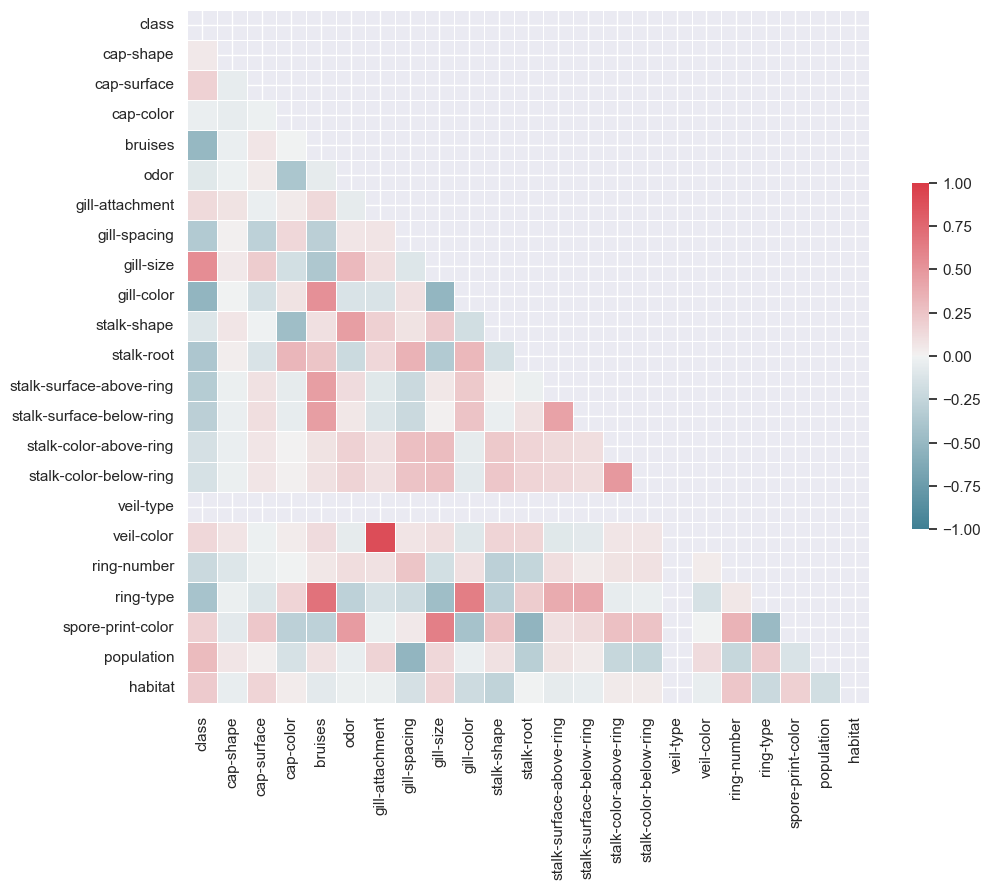

In [67]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [68]:
data.drop(labels='veil-type', axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


# dzielę dataset na train i test

In [69]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,1:23]
y=data[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
m1 = logr.fit(X_train,y_train.values.ravel())

In [72]:
logr.score(X_test, y_test)

0.9563076923076923

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
m2 = rf.fit(X_train, y_train.values.ravel())

In [74]:
rf.score(X_test, y_test)

1.0

# neural network model

In [88]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
m3 = Sequential()
m3.add(Dense(200,activation="sigmoid", input_shape=(X_train.shape[1],)))
m3.add(Dense(100,activation="sigmoid"))
m3.add(Dense(50,activation="sigmoid"))
m3.add(Dense(10,activation="sigmoid"))
m3.add(Dense(1,activation="sigmoid"))
m3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 200)               4600      
                                                                 
 dense_46 (Dense)            (None, 100)               20100     
                                                                 
 dense_47 (Dense)            (None, 50)                5050      
                                                                 
 dense_48 (Dense)            (None, 10)                510       
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 30,271
Trainable params: 30,271
Non-trainable params: 0
_________________________________________________________________


In [89]:
m3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [90]:
history = m3.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
204/204 [==============================] - 4s 7ms/step - loss: 0.4424 - accuracy: 0.8178 - val_loss: 0.2104 - val_accuracy: 0.9545
Epoch 2/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1838 - accuracy: 0.9589 - val_loss: 0.1532 - val_accuracy: 0.9655
Epoch 3/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1606 - accuracy: 0.9625 - val_loss: 0.1403 - val_accuracy: 0.9686
Epoch 4/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1497 - accuracy: 0.9652 - val_loss: 0.1259 - val_accuracy: 0.9735
Epoch 5/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1341 - accuracy: 0.9705 - val_loss: 0.1168 - val_accuracy: 0.9754
Epoch 6/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1292 - accuracy: 0.9717 - val_loss: 0.1154 - val_accuracy: 0.9754
Epoch 7/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1285 - accuracy: 0.9717 - val_loss: 0.1148 - val_accuracy: 0.9754

Epoch 58/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1089 - accuracy: 0.9717 - val_loss: 0.0984 - val_accuracy: 0.9754
Epoch 59/100
204/204 [==============================] - 1s 5ms/step - loss: 0.1088 - accuracy: 0.9717 - val_loss: 0.0984 - val_accuracy: 0.9754
Epoch 60/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1086 - accuracy: 0.9717 - val_loss: 0.0983 - val_accuracy: 0.9754
Epoch 61/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1085 - accuracy: 0.9717 - val_loss: 0.0982 - val_accuracy: 0.9754
Epoch 62/100
204/204 [==============================] - 2s 8ms/step - loss: 0.1084 - accuracy: 0.9717 - val_loss: 0.0980 - val_accuracy: 0.9754
Epoch 63/100
204/204 [==============================] - 1s 5ms/step - loss: 0.1083 - accuracy: 0.9717 - val_loss: 0.0980 - val_accuracy: 0.9754
Epoch 64/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1082 - accuracy: 0.9717 - val_loss: 0.0982 - val_accuracy:

In [91]:
m3.evaluate(X_test,y_test)

51/51 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9834


[0.07302919775247574, 0.9833846092224121]